# Data set summary - data discretised
This notebook provides a summary of the data set

In [118]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
 # read dataframe from csv or pickle
df = pd.read_pickle('../data/data_discretised.pkl') 

In [154]:
df.head()

,user,year,month,day,hour,30min_interval,stoplocation,latitude,longitude,lat_bin,lon_bin
0,0.0,2013,10,31,12,1.0,0_98,55.783689,12.518387,135,130
1,0.0,2013,10,31,12,2.0,0_28,55.782019,12.521628,134,131
2,0.0,2013,10,31,13,1.0,0_28,55.782014,12.521608,134,131
3,0.0,2013,10,31,13,2.0,0_28,55.782003,12.521609,134,131
4,0.0,2013,10,31,14,1.0,0_28,55.782014,12.521579,134,131


# Map

# User


In [155]:
# count for every user the amount of unique stop locations
stoplocations_per_user = df.groupby('user').stoplocation.nunique() 


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


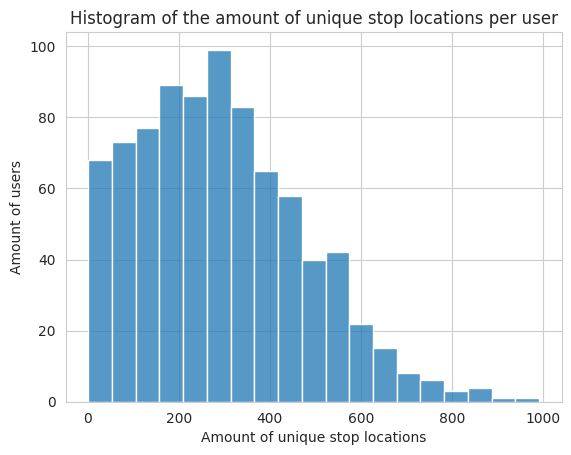

In [156]:
# use seaborn histplot to make a histogram of the amount of stop locations per user
sns.histplot(stoplocations_per_user)
plt.xlabel('Amount of unique stop locations')
plt.ylabel('Amount of users')
plt.title('Histogram of the amount of unique stop locations per user')
# save figure
plt.savefig('../figures/stoplocations_per_user.png')
plt.show()

# Time 

In [236]:
# Create a column for the date and day of the week
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day_of_week'] = df['date'].dt.day_name()

ValueError: Unable to parse string "October" at position 0

/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


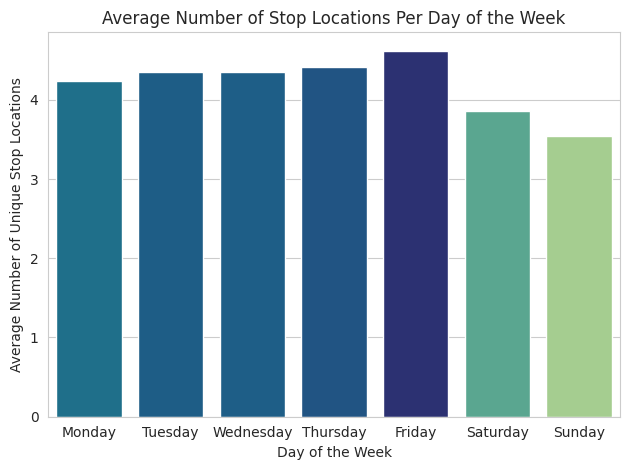

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Group by user and date, then count unique stop locations
grouped_df = df.groupby(['user', 'date'])['stoplocation'].nunique().reset_index()

# Rename the column to better represent what it holds
grouped_df.rename(columns={'stoplocation': 'unique_stop_count'}, inplace=True)

# Add day_of_week column and group by it to take the average unique_stop_count across users
grouped_df['day_of_week'] = grouped_df['date'].dt.day_name()
average_stops_per_day = grouped_df.groupby('day_of_week')['unique_stop_count'].mean().reset_index()

# Order days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_stops_per_day['day_of_week'] = pd.Categorical(average_stops_per_day['day_of_week'], categories=order, ordered=True)
average_stops_per_day = average_stops_per_day.sort_values('day_of_week')

# Create the barplot
ax = sns.barplot(x='day_of_week', y='unique_stop_count', data=average_stops_per_day, palette="crest")
plt.tight_layout()

# Get the individual bars and set their color based on their height
norm = plt.Normalize(average_stops_per_day['unique_stop_count'].min(), average_stops_per_day['unique_stop_count'].max())
sm = plt.cm.ScalarMappable(cmap='crest', norm=norm)
sm.set_array([])  

# Set the colors of the bars based on their height (value)
for p in ax.patches:
    plt.setp(p, 'facecolor', sm.to_rgba(p.get_height()))

# add labels
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Number of Unique Stop Locations')


plt.title('Average Number of Stop Locations Per Day of the Week')
plt.tight_layout()
# save figure with 300 dpi
plt.savefig('../figures/stoplocations_per_day_of_the_week.png', dpi=300)

plt.show()

## Month

/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


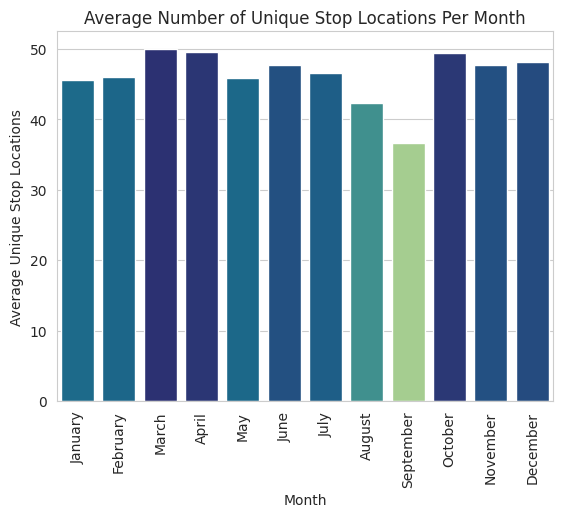

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a column for the date and month name
df['month_name'] = df['date'].dt.month_name()

# Group by user and month_name, then count unique stop locations
grouped_df = df.groupby(['user', 'month_name'])['stoplocation'].nunique().reset_index()

# Rename the column to better represent what it holds
grouped_df.rename(columns={'stoplocation': 'unique_stop_count'}, inplace=True)

# Group by month_name to take the average unique_stop_count across users
average_stops_per_month = grouped_df.groupby('month_name')['unique_stop_count'].mean().reset_index()

# Order the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_stops_per_month['month_name'] = pd.Categorical(average_stops_per_month['month_name'], categories=months_order, ordered=True)
average_stops_per_month = average_stops_per_month.sort_values('month_name')

# Create the barplot
ax = sns.barplot(x='month_name', y='unique_stop_count', data=average_stops_per_month, order=months_order)

# Get the individual bars and set their color based on their height
norm = plt.Normalize(average_stops_per_month['unique_stop_count'].min(), average_stops_per_month['unique_stop_count'].max())
sm = plt.cm.ScalarMappable(cmap='crest', norm=norm)
sm.set_array([])

# Set the colors of the bars based on their height (value)
for p in ax.patches:
    plt.setp(p, 'facecolor', sm.to_rgba(p.get_height()))


# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Unique Stop Locations')
plt.title('Average Number of Unique Stop Locations Per Month')
plt.xticks(rotation=90)  # Rotate month names for better visibility

# save figure with 300 dpi
plt.savefig('../figures/stoplocations_per_month_of_the_year.png', dpi=300)

plt.show()


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


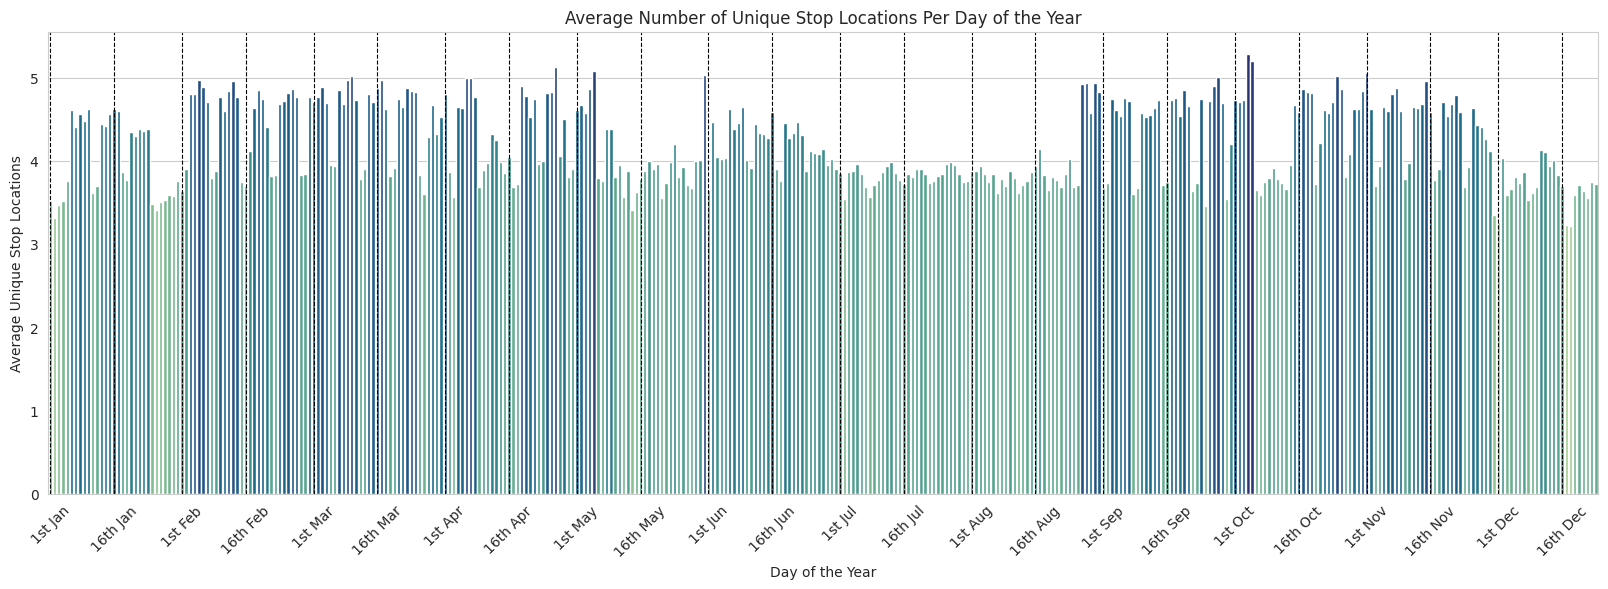

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Group by user and date, then count unique stop locations
grouped_df = df.groupby(['user', 'date'])['stoplocation'].nunique().reset_index()

# Rename the column to better represent what it holds
grouped_df.rename(columns={'stoplocation': 'unique_stop_count'}, inplace=True)

# Create a new column that captures the day of the year
grouped_df['day_of_year'] = grouped_df['date'].dt.strftime('%j')

# Group by day_of_year to take the average unique_stop_count across users
average_stops_per_day = grouped_df.groupby('day_of_year')['unique_stop_count'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(20, 6))

# Create the barplot
ax = sns.barplot(x='day_of_year', y='unique_stop_count', data=average_stops_per_day)

# Get the individual bars and set their color based on their height
norm = plt.Normalize(average_stops_per_day['unique_stop_count'].min(), average_stops_per_day['unique_stop_count'].max())
sm = plt.cm.ScalarMappable(cmap='crest', norm=norm)
sm.set_array([])

# Set the colors of the bars based on their height (value)
for p in ax.patches:
    plt.setp(p, 'facecolor', sm.to_rgba(p.get_height()))

# Add labels and title
plt.xlabel('Day of the Year')
plt.ylabel('Average Unique Stop Locations')
plt.title('Average Number of Unique Stop Locations Per Day of the Year')

# Generate the special labels for the whole year
selected_days = [
    '001', '016', '032', '047', '063', '078', '094', '109', '125', 
    '140', '156', '171', '187', '202', '218', '233', '249', '264', 
    '280', '295', '311', '326', '342', '357'
]
labels = [
    '1st Jan', '16th Jan', '1st Feb', '16th Feb', '1st Mar', '16th Mar', '1st Apr', '16th Apr',
    '1st May', '16th May', '1st Jun', '16th Jun', '1st Jul', '16th Jul', '1st Aug', '16th Aug',
    '1st Sep', '16th Sep', '1st Oct', '16th Oct', '1st Nov', '16th Nov', '1st Dec', '16th Dec'
]

# Set custom x-axis labels
custom_ticks = [int(day) - 1 for day in selected_days]
ax.set_xticks(custom_ticks)
ax.set_xticklabels(labels, rotation=45)

# Add black ticks for better visibility of custom labels
for tick in custom_ticks:
    ax.axvline(x=tick, color='black', linewidth=0.8, linestyle='--')

# save figure with 300 dpi
plt.savefig('../figures/stoplocations_per_day_of_the_year.png', dpi=300)

plt.show()


# Outlier detection

In [53]:
# show all users with less than 10 stop locations
stoplocations_per_user[stoplocations_per_user < 10]

user
316.0    5
417.0    1
454.0    2
603.0    5
710.0    5
714.0    4
727.0    8
732.0    2
742.0    3
796.0    3
813.0    9
821.0    1
841.0    4
846.0    2
Name: stoplocation, dtype: int64

In [30]:
# select the data of user 813
df_user_813 = df[df.user == 813]
df_user_813.head()



,user,timestamp,latitude,longitude,accuracy,stoplocation
234483659,813.0,1.389703e+09,55.783861,12.516848,28.000,-1
234483660,813.0,1.389703e+09,55.783861,12.516848,19.435,-1
234483661,813.0,1.389703e+09,55.783861,12.516847,27.000,-1
234483662,813.0,1.389704e+09,55.783699,12.517343,20.000,-1
234483663,813.0,1.389704e+09,55.783718,12.517385,20.000,-1


In [34]:
# plot the stop locations of user 813 on a map
import folium
from folium.plugins import MarkerCluster

# create map
m = folium.Map(location=[55.8, 12.51], zoom_start=10)

# add marker for every stop location
for index, row in df_user_813.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# show map
m


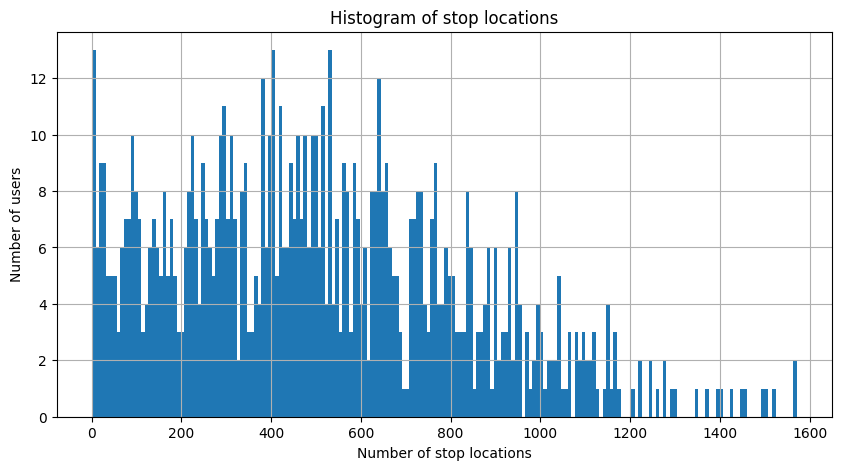

In [25]:
# plot histogram for stoplocations per user
stoplocations_per_user.hist(bins=200, figsize=(10,5))
plt.xlabel('Number of stop locations')
plt.ylabel('Number of users')
plt.title('Histogram of stop locations')
plt.show()


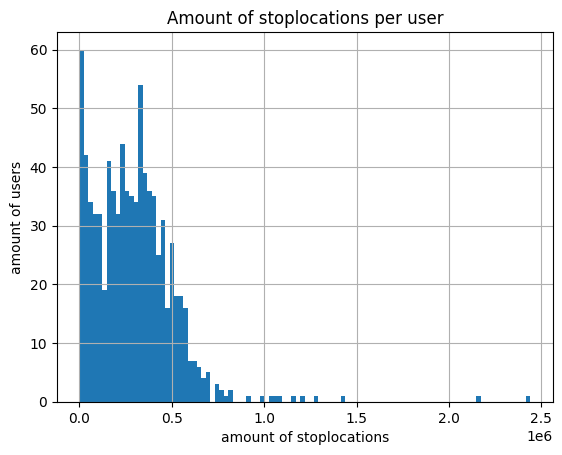

In [13]:
# plot amount of stoplocations per user
df.groupby('user').size().hist(bins=100)
plt.xlabel('amount of stoplocations')
plt.ylabel('amount of users')
plt.title('Amount of stoplocations per user')
plt.show()